In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np


In [4]:
train_data_dir = 'Desktop/project1/train'
test_data_dir = 'Desktop/project1/test'
image_size = (64, 64)
batch_size = 32
num_classes = 7  # Number of animal classes

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 4571 images belonging to 7 classes.
Found 2128 images belonging to 7 classes.


In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [7]:
epochs = 15
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

Epoch 1/15


2023-08-31 03:34:30.259427: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


142/142 [==============================] - ETA: 0s - loss: 1.8430 - accuracy: 0.2787

2023-08-31 03:35:49.134384: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


142/142 [==============================] - 85s 591ms/step - loss: 1.8430 - accuracy: 0.2787 - val_loss: 1.5604 - val_accuracy: 0.4205
Epoch 2/15
142/142 [==============================] - 82s 578ms/step - loss: 1.5748 - accuracy: 0.3979 - val_loss: 1.4174 - val_accuracy: 0.4678
Epoch 3/15
142/142 [==============================] - 84s 592ms/step - loss: 1.4212 - accuracy: 0.4701 - val_loss: 1.3372 - val_accuracy: 0.4948
Epoch 4/15
142/142 [==============================] - 84s 594ms/step - loss: 1.2674 - accuracy: 0.5257 - val_loss: 1.3229 - val_accuracy: 0.5090
Epoch 5/15
142/142 [==============================] - 82s 577ms/step - loss: 1.0961 - accuracy: 0.5986 - val_loss: 1.3246 - val_accuracy: 0.5104
Epoch 6/15
142/142 [==============================] - 82s 576ms/step - loss: 0.9061 - accuracy: 0.6706 - val_loss: 1.4093 - val_accuracy: 0.5218
Epoch 7/15
142/142 [==============================] - 82s 576ms/step - loss: 0.7238 - accuracy: 0.7372 - val_loss: 1.4607 - val_accuracy: 0.5

In [8]:
model.save('animal_classifier_model.h5')


 2/66 [..............................] - ETA: 4s - loss: 1.3213 - accuracy: 0.5938

2023-08-31 03:57:20.560266: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


66/66 [==============================] - 5s 73ms/step - loss: 2.3054 - accuracy: 0.5208
Test Loss: 2.3054
Test Accuracy: 0.5208


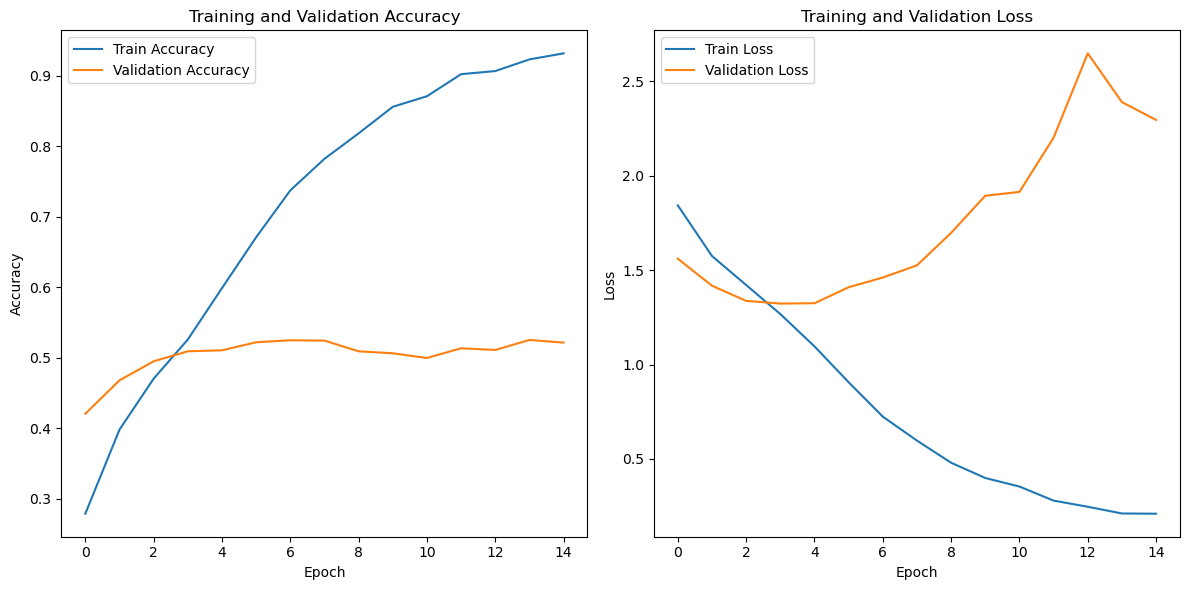

In [10]:
import matplotlib.pyplot as plt
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np

loaded_model = tf.keras.models.load_model('animal_classifier_model.h5')

# Open the camera
cap = cv2.VideoCapture(0, cv2.CAP_V4L2)


while True:
    ret, frame = cap.read()

    if not ret:
        break

    resized_frame = cv2.resize(frame, image_size)
    normalized_frame = resized_frame / 255.0
    input_frame = np.expand_dims(normalized_frame, axis=0)

    predictions = loaded_model.predict(input_frame)
    predicted_class = np.argmax(predictions)

    class_labels = ['bear', 'ostrich', 'pigs', 'horses', 'owl', 'gorilla']
    animal_label = class_labels[predicted_class]
    confidence = predictions[0][predicted_class]

    text = f'Animal: {animal_label} ({confidence:.2f})'
    cv2.putText(frame, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    
    cv2.imshow('Animal Classifier', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 18ms/step


IndexError: list index out of range